# New heading

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import numpy as np
import seaborn as sns #Graph library that use matplot in background
import math
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

FILL_NA_VALUE = -1.0
NORMALIZE_RANGE = (-1.0,1.0)
drop_cols = ['id_01004_cut_tech']
target = 'id_13008_RGT_erfolgreich_1try'

In [3]:

data = pd.read_csv('TRUMPF_TruLaserCenter_Dataset_2018.csv')
df = pd.DataFrame(data)


In [4]:


#data.values.shape
#ID 00: basic information
#* ID 01: sheet properties
#* ID 02: part geometry
#* ID 03: pin properties


In [5]:
NORMALIZE_RANGE = (-1.0,1.0)

def normalizeFeature(data, f_min=NORMALIZE_RANGE[0], f_max=NORMALIZE_RANGE[1]):
    d_min, d_max = min(data), max(data)
    #print('dmax',d_max,'dmin',d_min)
    factor = (f_max - f_min) / (d_max - d_min)
    normalized = f_min + (data - d_min) * factor
    return normalized, factor

def cat_to_num(data):
    categories = np.unique(data)
    features = {}
    for cat in categories:
        binary = (data == cat)
        features["%s=%s" % (data.name, cat)] = binary.astype("int")
    return pd.DataFrame(features)

def check_data_for_nans(data):
    for col in data:
        try:
            np.unique(data[col])
        except:
            print('column', col, 'One value is not compatible in this column ', data[col].values)

            
def pre_process(data,cat_feats, sqrt_feats):
    for feat in data:
        data[feat] = normalizeFeature(data[feat])[0]
    for feat in data:
        data[feat].fillna('NAN',inplace=True)
    for feat in cat_feats:
        data = data.join(cat_to_num(data[feat]))
    return data


In [6]:

basic = data.filter(regex='id_00', axis=1)
sheet = data.filter(regex='id_01', axis=1)
part = data.filter(regex='id_02', axis=1)
pin = data.filter(regex='id_03', axis=1)
print('basic',basic.shape)
print('sheet',sheet.shape)
print('part',part.shape)
print('pin',pin.shape)

basic (121085, 5)
sheet (121085, 9)
part (121085, 18)
pin (121085, 63)


In [7]:
check_data_for_nans(sheet)

column id_01004_cut_tech One value is not compatible in this column  ['N2' 'N2' 'N2' ... 'N2' 'N2' 'N2']


In [8]:
print(sheet[0:1])

def print_cats(data):
    cats = np.unique(data)
    print(cats)

   id_01001_density  id_01002_thickness  id_01003_emodul id_01004_cut_tech  \
0          0.000008                 1.5           200000                N2   

   id_01005_b_spalt  id_01006_zerschneidung_tafel  id_01007_k_flex_s1  \
0              0.23                      0.556608         133333.3333   

   id_01008_k_flex_s2  id_01009_k_flex_s3  
0         88888.88889         59259.25926  


In [9]:
for feat in sheet:
    print_cats(feat)


['id_01001_density']
['id_01002_thickness']
['id_01003_emodul']
['id_01004_cut_tech']
['id_01005_b_spalt']
['id_01006_zerschneidung_tafel']
['id_01007_k_flex_s1']
['id_01008_k_flex_s2']
['id_01009_k_flex_s3']


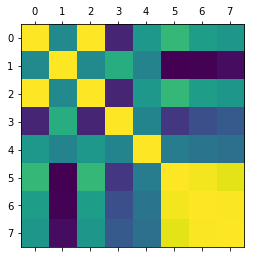

In [10]:
corr = sheet.corr()
corr.style.background_gradient()
plt.matshow(corr)

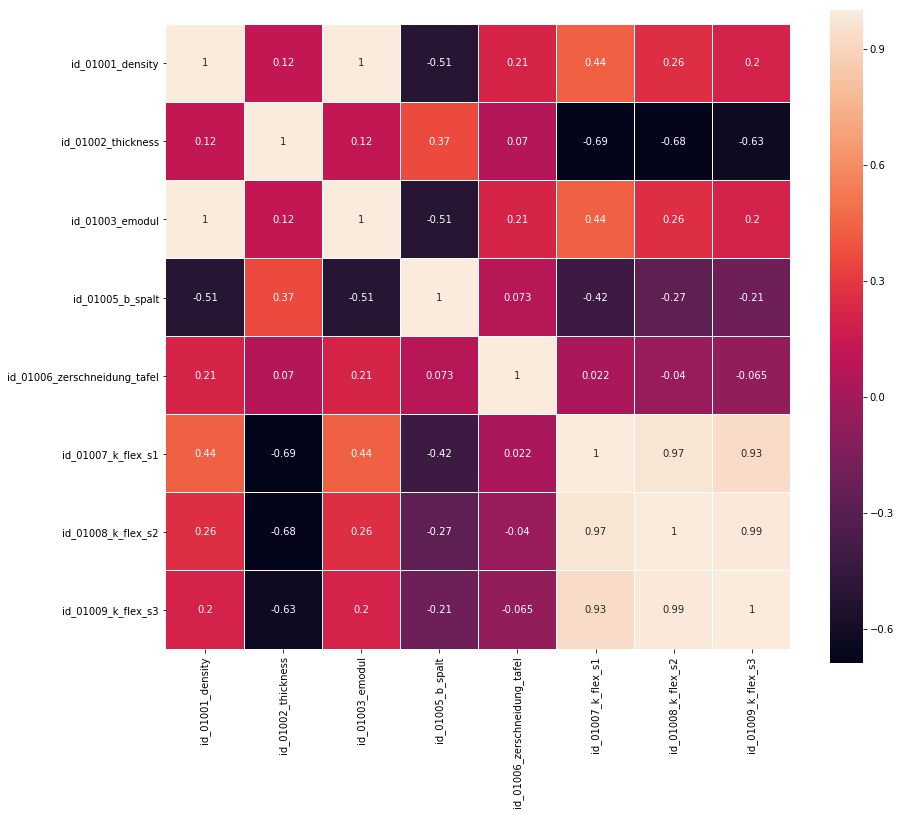

In [10]:

sheet2 = sheet.drop(drop_cols,axis=1)

plt.figure(figsize=(14,12))
sns.heatmap(sheet2.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.savefig('viz/' + "sheet_heatmap"+'.png', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:

#sheet2 = sheet.drop(drop_cols,axis=1)

plt.figure(figsize=(80,30))
sns.heatmap(pin.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.savefig('viz/' + "pin_heatmap"+'.png', dpi=300, bbox_inches='tight')
plt.show()

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(part.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.savefig('viz/' + "part_heatmap"+'.png', dpi=300, bbox_inches='tight')

plt.show()

In [11]:
import calendar

def weekday(string):
    day = string[0:2]
    month = string[3:5]
    year = string[6:10]
    ans = calendar.weekday((int)(year),(int)(month),(int)(day))
    return calendar.day_name[ans]

#convert timestamp to weekday
datetim = np.array(data['id_13001_date'])
for i,tim in enumerate(datetim):
    datetim[i] = weekday(tim)
data['id_13001_date'] = datetim


In [12]:
# encode
cat_features = ['id_00002_name_lst','id_00003_name_teil','id_00004_maschinennummer','id_00006_framework_version','id_03006_Z_pushout_modus','id_03063_B_N_E1','id_13001_date']
data.drop('id_01004_cut_tech',axis=1,inplace=True)
data.drop('DataID',axis=1,inplace=True)

#code categorical data
label = LabelEncoder()
for cat in cat_features:
        data[cat] = label.fit_transform(data[cat])




In [20]:
corrTarget = data.astype(float).corr()
corrTarget.to_csv('corrWithTarget.csv')

In [ ]:
# all features
plt.figure(figsize=(80,30))
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.savefig('viz/' + "all_heatmap"+'.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
# check influence of feature for target
for feat in data.columns.values:
    plt.figure()
    data.groupby('id_13008_RGT_erfolgreich_1try')[feat].hist(alpha=0.3)
    plt.title(feat)
    plt.savefig('viz/hist/' + feat+'.png', dpi=300, bbox_inches='tight')
    plt.close()


In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(pin, alpha=0.2, figsize=(30, 30), diagonal='kde')

/home/kaiman/Frameworks/venv3_tf/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


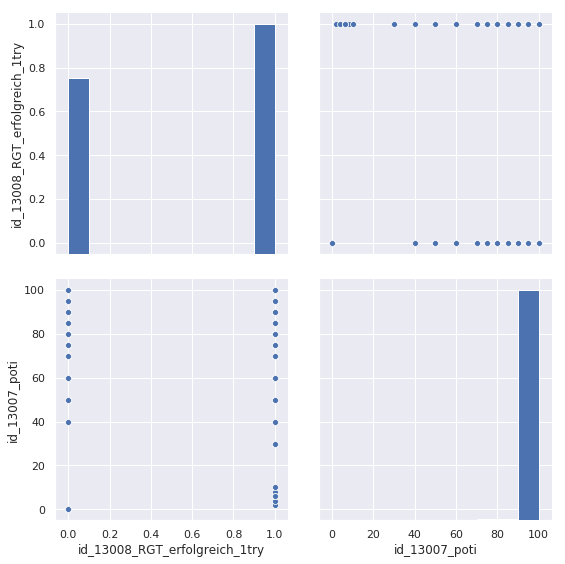

In [11]:
sns.set()
cols = basic
df2 = df[['id_13008_RGT_erfolgreich_1try','id_13007_poti']].copy()
sns.pairplot(df2, size = 4)
plt.show()
#df2['id_13007_poti'].apply(lambda x:math.sqrt(x))
#sns.pairplot(df2, size = 4)
#plt.show()


In [ ]:
#new = data[['id_13008_RGT_erfolgreich_1try','id_13001_date']].copy()
#g = sns.FacetGrid(new, col='id_13008_RGT_erfolgreich_1try')
#g.map(plt.hist, 'id_13001_date', alpha= .5,bins=10)
g = sns.FacetGrid(df, col="id_13008_RGT_erfolgreich_1try",  row="id_13001_date")
g = g.map(plt.hist, "total_bill")


In [ ]:
plt.show()

In [ ]:
data["id_13001_date"]

In [ ]:
import calendar

month,day,year = 10,20,2018
ans =calendar.weekday(year,month,day)

print(calendar.day_name[ans])

#for day in data["id_13001_date"]:
 #   print()
print(data["id_13001_date"][0])
day = data["id_13001_date"][0][0:2]
month = data["id_13001_date"][0][3:5]
year = data["id_13001_date"][0][6:10]
print(year)
ans = calendar.weekday((int)(year),(int)(month),(int)(day))
print(calendar.day_name[ans])
    
def weekday(string):
    day = string[0:2]
    month = string[3:5]
    year = string[6:10]
    ans = calendar.weekday((int)(year),(int)(month),(int)(day))
    return calendar.day_name[ans]

In [ ]:
newdata = data.copy() 
newdata["id_13001_date"].apply(weekday)

In [ ]:
def cat_to_num(data):
    categories = np.unique(data)
    features = {}
    for cat in categories:
        binary = (data == cat)
        features["%s=%s" % (data.name, cat)] = binary.astype("int")
    return pd.DataFrame(features)

newdata = newdata.join(cat_to_num(newdata["id_13001_date"]))

In [ ]:
plt.rcParams['figure.figsize'] = (10,10)
sheet2 = sheet.copy()
sheet2[target] = data[target]
bp = sheet2.boxplot(by=target)